# Import Library & Data

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
import os 
os.chdir(r"D:\Mahesh\IMARTICUS\prj") 

In [3]:
# importing or loading the dataset 
Data_for_PCA = pd.read_csv(r"BOWLERS.csv")

Data_for_PCA.head()

,Name,Role,Wickets,Economy,Bowling_Average,Bowling_strike_rate
0,Basil Thampi,BOWLER,17,9.80,40.82,25.00
1,Mitchell Santner,BOWLER,6,7.00,24.50,21.00
2,Rahul Tewatia,BOWLER,24,7.13,28.33,23.83
3,Hardik Pandya,BOWLER,42,9.07,31.26,20.69
4,Kieron Pollard,BOWLER,60,8.88,32.67,22.08


# Data Pre-Processing

### Checking missing values

In [4]:
Data_for_PCA.isna().sum()

Name                   0
Role                   0
Wickets                0
Economy                0
Bowling_Average        0
Bowling_strike_rate    0
dtype: int64

- There is no missing value in the data

# Exploratory Data Analysis

<AxesSubplot:xlabel='Wickets', ylabel='Count'>

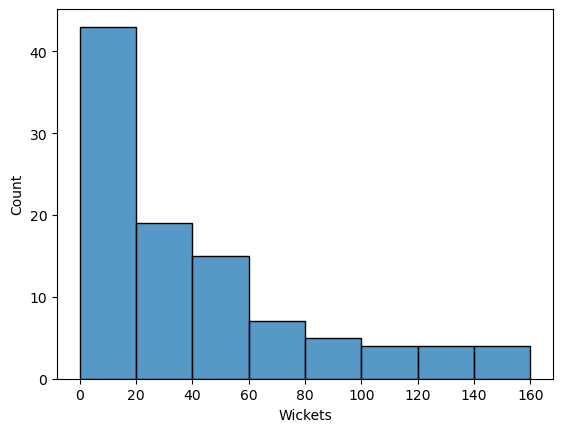

In [5]:
sns.histplot(data = Data_for_PCA, x = "Wickets")

<AxesSubplot:xlabel='Economy', ylabel='Count'>

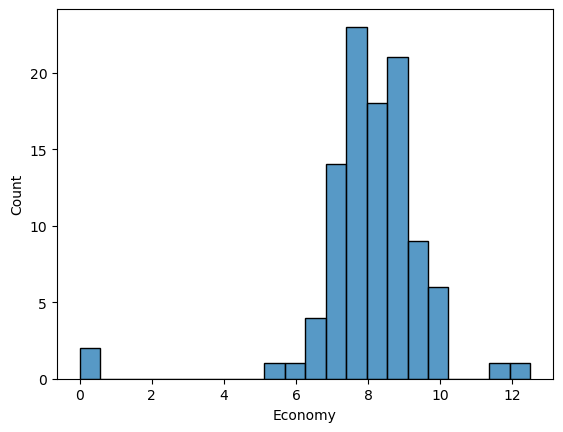

In [6]:
sns.histplot(data = Data_for_PCA, x = "Economy")

<AxesSubplot:xlabel='Bowling_Average', ylabel='Count'>

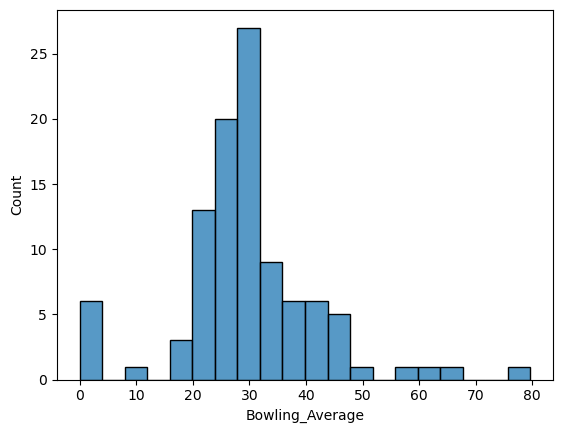

In [7]:
sns.histplot(data = Data_for_PCA, x = "Bowling_Average")

<AxesSubplot:xlabel='Bowling_strike_rate', ylabel='Count'>

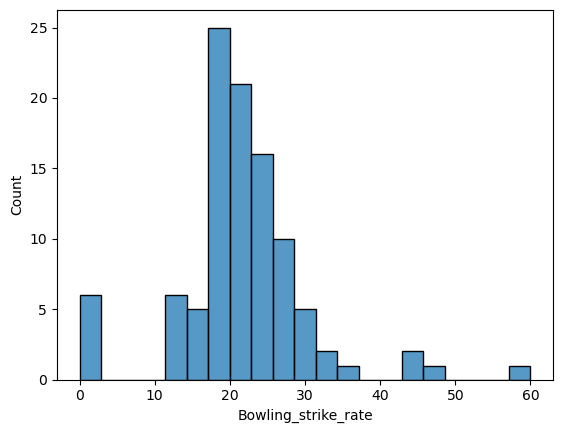

In [8]:
sns.histplot(data = Data_for_PCA, x = "Bowling_strike_rate")

In [9]:
Data_for_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 101 non-null    object 
 1   Role                 101 non-null    object 
 2   Wickets              101 non-null    int64  
 3   Economy              101 non-null    float64
 4   Bowling_Average      101 non-null    float64
 5   Bowling_strike_rate  101 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.9+ KB


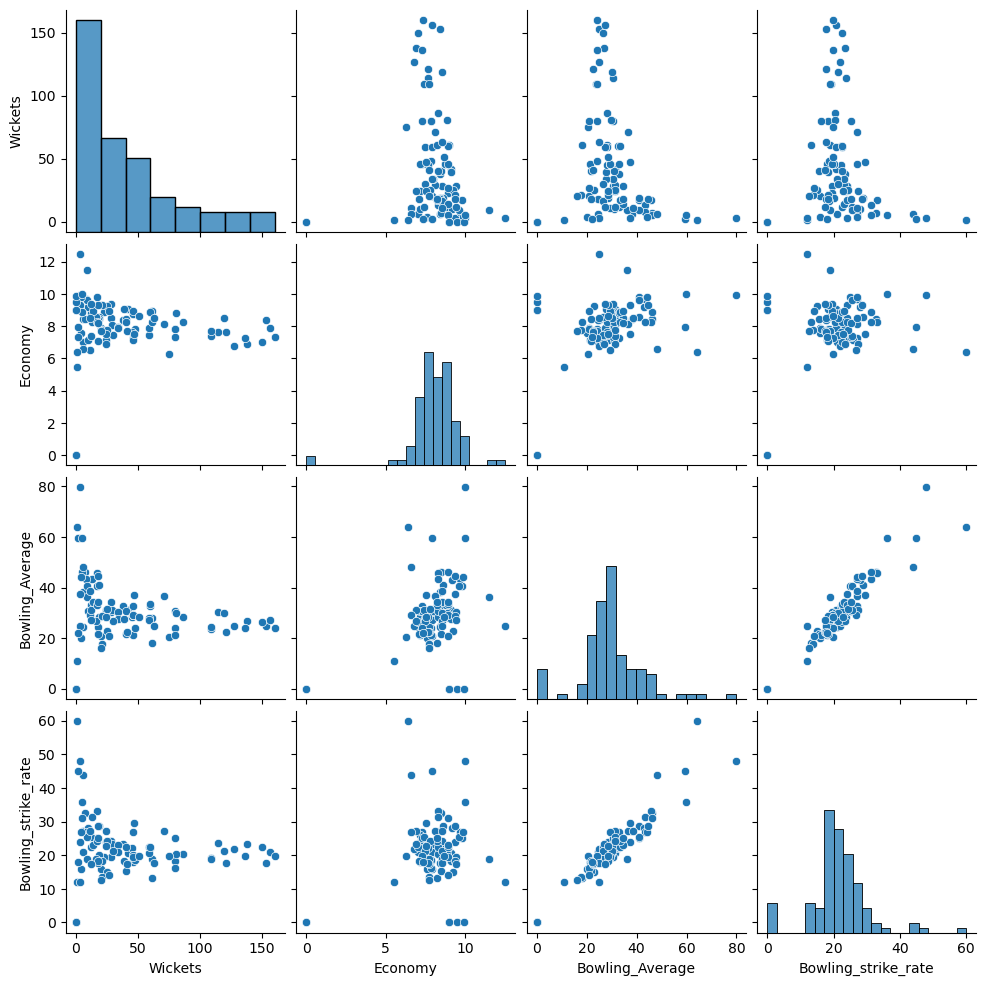

In [10]:
sns.pairplot(data=Data_for_PCA)

In [11]:
Data_for_PCA.describe()

,Wickets,Economy,Bowling_Average,Bowling_strike_rate
count,101.000000,101.000000,101.000000,101.000000
mean,39.920792,8.103168,29.453267,21.553762
std,41.141143,1.563866,12.561604,9.020566
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,7.510000,24.170000,18.330000
50%,24.000000,8.260000,28.540000,21.000000
75%,59.000000,8.890000,33.450000,25.170000
max,160.000000,12.500000,79.670000,60.000000


## Taking specific column for Analysis

In [12]:
numeric_predictors=['Wickets','Economy','Bowling_Average','Bowling_strike_rate']
X_train = Data_for_PCA[numeric_predictors]
y_train = Data_for_PCA['Name']

In [13]:
X_train.head()

,Wickets,Economy,Bowling_Average,Bowling_strike_rate
0,17,9.80,40.82,25.00
1,6,7.00,24.50,21.00
2,24,7.13,28.33,23.83
3,42,9.07,31.26,20.69
4,60,8.88,32.67,22.08


In [14]:
Correlation=X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Wickets,Economy,Bowling_Average,Bowling_strike_rate
Wickets,1.000000,-0.106171,-0.139140,-0.063906
Economy,-0.106171,1.000000,0.345487,0.147944
Bowling_Average,-0.139140,0.345487,1.000000,0.941686
Bowling_strike_rate,-0.063906,0.147944,0.941686,1.000000


<AxesSubplot:>

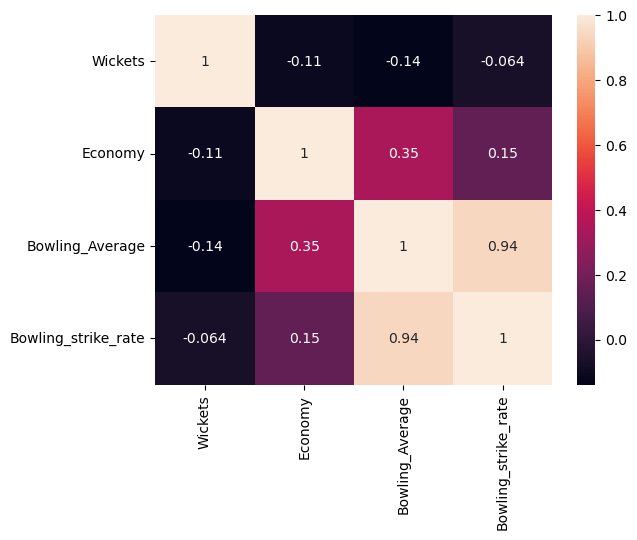

In [48]:
sns.heatmap(X_train.corr(), annot=True)

### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1)

In [15]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.

### Mean

In [16]:
X_train_1.mean(axis=0)

array([-2.41830758e-17,  2.58319219e-16, -1.47022108e-16,  2.68212295e-16])

### Standard Deviation

In [17]:
X_train_1.std(axis=0)

array([1., 1., 1., 1.])

In [18]:
X_train.head(3)

,Wickets,Economy,Bowling_Average,Bowling_strike_rate
0,17,9.80,40.82,25.00
1,6,7.00,24.50,21.00
2,24,7.13,28.33,23.83


In [19]:
X_train_1

array([[-5.59904494e-01,  1.09043511e+00,  9.09392241e-01,
         3.83947745e-01],
       [-8.28610279e-01, -7.08929161e-01, -3.96284755e-01,
        -6.16950538e-02],
       [-3.88909903e-01, -6.25387249e-01, -8.98666856e-02,
         2.53597226e-01],
       [ 5.07904724e-02,  6.21315137e-01,  1.44547138e-01,
        -9.62323707e-02],
       [ 4.90490848e-01,  4.99215419e-01,  2.57353790e-01,
         5.86285019e-02],
       [ 5.14918647e-01,  5.50625827e-01, -1.09867865e-01,
        -3.06798593e-01],
       [-8.28610279e-01,  2.10031876e-01,  6.97379738e-01,
         6.25708963e-01],
       [-4.69207222e-02,  1.84326672e-01,  2.62954120e-01,
         2.07918839e-01],
       [-2.91198709e-01,  8.20530467e-01,  7.81432219e-02,
        -2.33267531e-01],
       [-6.82043487e-01,  4.47805011e-01,  2.83755347e-01,
         1.05420996e-01],
       [-7.55326883e-01,  2.18933257e+00,  5.41370538e-01,
        -2.96771630e-01],
       [-2.91198709e-01,  2.74294885e-01,  3.92561763e-01,
      

# No. of variable in original dataset

In [20]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 2) # we are specifying we want 3 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [21]:
import numpy as np
list(np.round(principalComponents.explained_variance_,2))   # eigen values  >= 1 

[2.11, 1.02]

In [22]:
2.11/4

0.5275

In [23]:
1.02/4

0.255

In [24]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.52, 0.25]

* You can see that the first principal component contains 52% of the variance 
* You can see that the first principal component contains 25% of the variance 

In [25]:
0.52+0.25

0.77

In [26]:
principalComponents.mean_

array([-2.41830758e-17,  2.58319219e-16, -1.47022108e-16,  2.68212295e-16])

In [27]:
principalComponents.get_covariance()

array([[ 0.90581574, -0.28545871, -0.11367482, -0.02971225],
       [-0.28545871,  0.72574159,  0.32699252,  0.27055243],
       [-0.11367482,  0.32699252,  1.2265035 ,  0.73959565],
       [-0.02971225,  0.27055243,  0.73959565,  1.18193918]])

In [28]:
X_train_1 ### scaled dataset

array([[-5.59904494e-01,  1.09043511e+00,  9.09392241e-01,
         3.83947745e-01],
       [-8.28610279e-01, -7.08929161e-01, -3.96284755e-01,
        -6.16950538e-02],
       [-3.88909903e-01, -6.25387249e-01, -8.98666856e-02,
         2.53597226e-01],
       [ 5.07904724e-02,  6.21315137e-01,  1.44547138e-01,
        -9.62323707e-02],
       [ 4.90490848e-01,  4.99215419e-01,  2.57353790e-01,
         5.86285019e-02],
       [ 5.14918647e-01,  5.50625827e-01, -1.09867865e-01,
        -3.06798593e-01],
       [-8.28610279e-01,  2.10031876e-01,  6.97379738e-01,
         6.25708963e-01],
       [-4.69207222e-02,  1.84326672e-01,  2.62954120e-01,
         2.07918839e-01],
       [-2.91198709e-01,  8.20530467e-01,  7.81432219e-02,
        -2.33267531e-01],
       [-6.82043487e-01,  4.47805011e-01,  2.83755347e-01,
         1.05420996e-01],
       [-7.55326883e-01,  2.18933257e+00,  5.41370538e-01,
        -2.96771630e-01],
       [-2.91198709e-01,  2.74294885e-01,  3.92561763e-01,
      

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13

In [29]:
principalComponents.components_   ##  BETA VALUES  Z1 , Z2 

array([[-0.15617415,  0.3191562 ,  0.6791614 ,  0.64225287],
       [ 0.85134927, -0.42323865,  0.12748976,  0.28252403]])

### Renaming the Columns  

* Prediction for data to get data reduction 

In [30]:
X_train_1  # scaled data

array([[-5.59904494e-01,  1.09043511e+00,  9.09392241e-01,
         3.83947745e-01],
       [-8.28610279e-01, -7.08929161e-01, -3.96284755e-01,
        -6.16950538e-02],
       [-3.88909903e-01, -6.25387249e-01, -8.98666856e-02,
         2.53597226e-01],
       [ 5.07904724e-02,  6.21315137e-01,  1.44547138e-01,
        -9.62323707e-02],
       [ 4.90490848e-01,  4.99215419e-01,  2.57353790e-01,
         5.86285019e-02],
       [ 5.14918647e-01,  5.50625827e-01, -1.09867865e-01,
        -3.06798593e-01],
       [-8.28610279e-01,  2.10031876e-01,  6.97379738e-01,
         6.25708963e-01],
       [-4.69207222e-02,  1.84326672e-01,  2.62954120e-01,
         2.07918839e-01],
       [-2.91198709e-01,  8.20530467e-01,  7.81432219e-02,
        -2.33267531e-01],
       [-6.82043487e-01,  4.47805011e-01,  2.83755347e-01,
         1.05420996e-01],
       [-7.55326883e-01,  2.18933257e+00,  5.41370538e-01,
        -2.96771630e-01],
       [-2.91198709e-01,  2.74294885e-01,  3.92561763e-01,
      

In [31]:
transformed_data=principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[ 1.29967738e+00, -7.13775912e-01],
       [-4.05616769e-01, -4.73343112e-01],
       [-3.70189838e-02, -6.21987600e-03],
       [ 2.26729741e-01, -2.28483829e-01],
       [ 2.95164791e-01,  2.55665695e-01],
       [-1.76341623e-01,  1.04644478e-01],
       [ 1.07193726e+00, -5.28643776e-01],
       [ 3.78281564e-01, -2.56940711e-02],
       [ 2.10610216e-01, -6.51133241e-01],
       [ 5.09859922e-01, -7.04225751e-01],
       [ 9.93777140e-01, -1.58448308e+00],
       [ 5.87550811e-01, -2.31292424e-01],
       [-1.57111884e-01,  1.73917796e+00],
       [ 3.81395299e-01,  5.60598962e-01],
       [-7.33400368e-01,  7.59200140e-01],
       [ 5.93567489e-02, -6.32966400e-01],
       [-4.65228801e+00,  3.94883793e-01],
       [-8.94539306e-01,  2.10027728e+00],
       [ 1.31988384e+00, -2.17573146e-01],
       [ 1.52995474e+00, -5.66489293e-01],
       [-2.15242849e-01,  5.86990865e-01],
       [ 3.00768538e-01, -2.09742780e-01],
       [ 1.38759483e-02,  1.18070640e+00],
       [ 9.

In [32]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (101, 4)
transformed shape: (101, 2)


In [33]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2'])
principalDf.head()

,Data PC1,Data PC2
0,1.299677,-0.713776
1,-0.405617,-0.473343
2,-0.037019,-0.006220
3,0.226730,-0.228484
4,0.295165,0.255666


# To check the Principal Component is uncorrelated / independent

In [34]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Data PC1,Data PC2
Data PC1,1.000000,-0.000000
Data PC2,-0.000000,1.000000


## Identify variable is combining together in Which PCA 

In [35]:
numeric_predictors_1=['Wickets','Economy','Bowling_Average','Bowling_strike_rate']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Wickets,Economy,Bowling_Average,Bowling_strike_rate
0,-0.559904,1.090435,0.909392,0.383948
1,-0.828610,-0.708929,-0.396285,-0.061695
2,-0.388910,-0.625387,-0.089867,0.253597
3,0.050790,0.621315,0.144547,-0.096232
4,0.490491,0.499215,0.257354,0.058629


In [36]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Wickets,Economy,Bowling_Average,Bowling_strike_rate,Data PC1,Data PC2
0,-0.559904,1.090435,0.909392,0.383948,1.299677,-0.713776
1,-0.828610,-0.708929,-0.396285,-0.061695,-0.405617,-0.473343
2,-0.388910,-0.625387,-0.089867,0.253597,-0.037019,-0.006220
3,0.050790,0.621315,0.144547,-0.096232,0.226730,-0.228484
4,0.490491,0.499215,0.257354,0.058629,0.295165,0.255666


In [37]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:4,4:6])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2
Wickets,22.600000,85.600000
Economy,46.100000,42.600000
Bowling_Average,98.100000,12.800000
Bowling_strike_rate,92.700000,28.400000


* Data PC1 = Bowling_Average, Bowling_strike_rate 
* Data PC2 = Wickets

In [38]:
a=final_data["Data PC1"]

In [39]:
b=final_data["Data PC2"]

In [40]:
c=a+b

In [41]:
c.head()

0    0.585901
1   -0.878960
2   -0.043239
3   -0.001754
4    0.550830
dtype: float64

In [42]:
d=pd.DataFrame(y_train)


In [43]:
Bowler_ranking_final=pd.concat([c,d],axis=1)

In [44]:
Bowler_ranking_final.head()

,0,Name
0,0.585901,Basil Thampi
1,-0.878960,Mitchell Santner
2,-0.043239,Rahul Tewatia
3,-0.001754,Hardik Pandya
4,0.550830,Kieron Pollard


In [45]:
Bowler_ranking_final1= Bowler_ranking_final.sort_values([0],ascending=False,ignore_index= True)

In [46]:
Bowler_ranking_final1.head()

,0,Name
0,5.643604,Josh Hazlewood
1,5.214368,James Neesham
2,3.722387,Sandeep Warrier
3,3.047057,Jayant Yadav
4,2.728973,Avesh Khan


In [47]:
Bowler_ranking_final1.to_csv("ranking_bowler_ipl.csv",index=False)